# VICTORIA HOUSING ANALYSIS

## Data Preprocessing 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
house = pd.read_csv('../data/curated/merge_data_v2.csv')
# house.head(3)

#### 1. Price extraction

In [3]:
import re

# extract rent price 
p='([\d]{1,}[,][\d]{2,}|[\d]{2,4})'
house['rent price'] = house.price.str.extract(p) #.astype(float)


In [4]:
from xml.etree.ElementPath import find

house[house['rent price']=="1,450"]['rent price'].str.replace(',', "")


264      1450
423      1450
21770    1450
22563    1450
26406    1450
62177    1450
93464    1450
Name: rent price, dtype: object

In [5]:
house['rent price'] = house['rent price'].str.replace(',', "")
house['rent price'] = house['rent price'].astype(float)

In [6]:
# house['rent price'] = house['rent price'].astype(float)

In [7]:
# house.loc[(house.rent != 'NaN'),'rent_price']=house.rent
# house = house.assign(rent_price=np.where(house.rent.isnull(), house['rent price'], house['rent']))
# house = house.drop(['rent price'], axis=1)

In [8]:
house[house['rent price']<150]

,Unnamed: 0,index,propertyTypes,bathrooms,bedrooms,carspaces,dateUpdated,dateListed,geoLocation,landAreaSqm,postcode,surburb,year,month,price,bond,rent,longitude,latitude,geometry,index_right,SA2_maincode_2021,distance of the closest bus stop,count of bus stop,distance of the closest train stop,count of train stop,distance of the closest tram stop,count of tram stop,distance of the closest vline stop,count of vline stop,distance of the closest school,count of school,count of hospital,distance to the closest shopping mall,count of shopping mall,bench,cafe,childcare,fast_food,kindergarten,parking,restaurant,place_of_worship,school,university,garden,park,playground,pitch,offence count,incidents recorded,Population,Population Increase,Earners (persons),Median age of earners (years),Sum ($),Median ($),Mean ($),Male,Female,Person,Male Ratio,Female Ratio,rent price
5782,5782,38447,"['offices', 'medicalConsulting', 'retail', 'se...",0.0,0.0,0.0,2022-02-07T07:34:56.24Z,2018-02-01T07:09:06Z,"{""latitude"": -37.8357683, ""longitude"": 144.973...",NaN,3004,melbourne,2022,2,$50k per year. flexible terms,NaN,50.0,144.973876,-37.835768,POINT (144.9738758 -37.8357683),785,206051128,0.474419,3,NaN,0,0.469901,6,NaN,0,0.473209,4.0,3,NaN,0,86.0,50.0,0.0,10.0,1.0,128.0,86.0,6.0,2.0,8.0,46.0,28.0,6.0,11.0,51905.0,25831.0,15936.911524,-0.005373,12806.908285,44.563061,1.705666e+09,69465.138466,129707.632203,7735.997516,8202.100418,15936.911524,0.485414,0.514661,50.0
5892,5892,51377,['carspace'],0.0,0.0,1.0,2019-03-24T23:31:36.177Z,2018-10-29T02:06:15Z,"{""latitude"": -37.8387717, ""longitude"": 144.975...",NaN,3004,melbourne,2019,3,50.0,217.0,NaN,144.975575,-37.838772,POINT (144.9755755 -37.8387717),785,206051128,0.471887,3,NaN,0,0.467345,6,NaN,0,0.470610,4.0,3,NaN,0,86.0,50.0,0.0,10.0,1.0,128.0,86.0,6.0,2.0,8.0,46.0,28.0,6.0,11.0,51905.0,25831.0,17071.000000,0.020993,11999.357411,44.255814,1.473181e+09,68185.664938,122800.014792,8529.000000,8542.000000,17071.000000,0.499619,0.500381,50.0
5893,5893,51378,['carspace'],0.0,0.0,1.0,2019-03-24T23:31:23.23Z,2018-10-29T02:07:44Z,"{""latitude"": -37.8387717, ""longitude"": 144.975...",NaN,3000,melbourne,2019,3,50.0,217.0,NaN,144.975575,-37.838772,POINT (144.9755755 -37.8387717),785,206051128,0.426982,19,NaN,0,0.425963,23,0.424659,1,0.425998,4.0,4,0.235081,26,31.0,20.0,0.0,8.0,1.0,56.0,13.0,4.0,3.0,0.0,3.0,15.0,4.0,6.0,161725.0,125561.0,17071.000000,0.020993,11999.357411,44.255814,1.473181e+09,68185.664938,122800.014792,8529.000000,8542.000000,17071.000000,0.499619,0.500381,50.0
5894,5894,51379,['parkingCarSpace'],0.0,0.0,0.0,2019-03-24T23:30:54.873Z,2018-10-29T02:10:14Z,"{""latitude"": -37.8387717, ""longitude"": 144.975...",NaN,3004,melbourne,2019,3,$50 per week,NaN,50.0,144.975575,-37.838772,POINT (144.9755755 -37.8387717),785,206051128,0.471887,3,NaN,0,0.467345,6,NaN,0,0.470610,4.0,3,NaN,0,86.0,50.0,0.0,10.0,1.0,128.0,86.0,6.0,2.0,8.0,46.0,28.0,6.0,11.0,51905.0,25831.0,17071.000000,0.020993,11999.357411,44.255814,1.473181e+09,68185.664938,122800.014792,8529.000000,8542.000000,17071.000000,0.499619,0.500381,50.0
5895,5895,51380,['parkingCarSpace'],0.0,0.0,0.0,2019-03-24T23:30:47.273Z,2018-10-29T02:20:33Z,"{""latitude"": -37.8387717, ""longitude"": 144.975...",NaN,3004,melbourne,2019,3,$50 per week,NaN,50.0,144.975575,-37.838772,POINT (144.9755755 -37.8387717),785,206051128,0.471887,3,NaN,0,0.467345,6,NaN,0,0.470610,4.0,3,NaN,0,86.0,50.0,0.0,10.0,1.0,128.0,86.0,6.0,2.0,8.0,46.0,28.0,6.0,11.0,51905.0,25831.0,17071.000000,0.020993,11999.357411,44.255814,1.473181e+09,68185.664938,122800.014792,8529.000000,8542.000000,17071.000000,0.499619,0.500381,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114940,114940,115447,['industrialWarehouse'],0.0,0.0,1.0,2022-05-22T06:11:10.97Z,2021-06-23T00:41:24Z,"

In [9]:
house['rent price'].value_counts()

400.0     5924
450.0     5262
350.0     5062
420.0     3785
380.0     3696
          ... 
1465.0       1
727.0        1
2640.0       1
406.0        1
5307.0       1
Name: rent price, Length: 1196, dtype: int64

/var/folders/74/fx737_kn4xj3gvzzm58zqvm00000gn/T/ipykernel_22813/2183122231.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


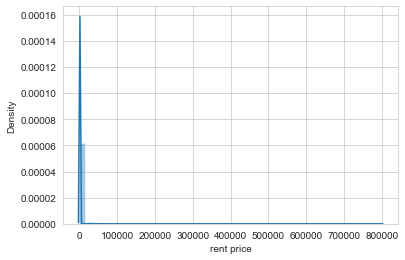

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/74/fx737_kn4xj3gvzzm58zqvm00000gn/T/ipykernel_22813/2183122231.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


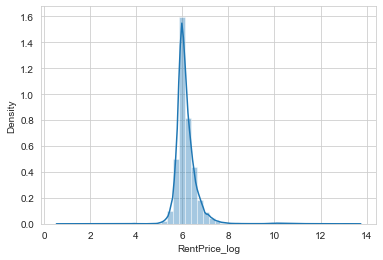

In [10]:
## check if we need to log the rental price as the price might be skewed
import seaborn as sns 
import matplotlib 
import matplotlib.pyplot as plt

x = house["rent price"]
sns.set_style('whitegrid')
sns.distplot(x)
plt.show()

house['RentPrice_log'] = np.log(house["rent price"])
x = house['RentPrice_log']
sns.distplot(x)
plt.show()

#### 2. Define Suburb
remove all suburb that has less than 10 properties within region

In [11]:
house.shape

(114960, 65)

In [12]:
# from numpy import average

# average(house['postcode'].value_counts())

In [13]:
# house['postcode'].value_counts()

In [14]:
## currently set to 10, if we set it to average then we only got 196 suburb left. 
## distinct suburb included in the orginal dataset was 478
# N = 10
# newdf = house[house.groupby('postcode')['postcode'].transform('count')>N].copy()


In [15]:
newdf = house
newdf['postcode'].value_counts()

3000    9819
3008    4582
3006    3464
3029    3163
3141    2872
        ... 
3517       1
3566       1
3341       1
3342       1
3747       1
Name: postcode, Length: 482, dtype: int64

#### 3. Rooms
 - bedroom 
 - bathroom 
 - carspace

In [16]:
newdf['bathrooms'].value_counts().sort_values(ascending=False)

1.0     61815
2.0     46109
3.0      4048
0.0      2484
4.0       416
5.0        62
6.0        14
8.0         6
12.0        3
25.0        1
9.0         1
32.0        1
Name: bathrooms, dtype: int64

In [17]:
Q1 = newdf['bedrooms'].quantile(0.25)
Q3 = newdf['bedrooms'].quantile(0.75)
IQR = Q3-Q1
newdf = newdf[(newdf['bedrooms'] > (Q1 - 3*IQR)) & (newdf['bedrooms'] < (Q3 + 3*IQR))]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc5919ea910>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc5919eaeb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc5919ea640>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc5919fa490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc5919fa760>],
 'means': []}

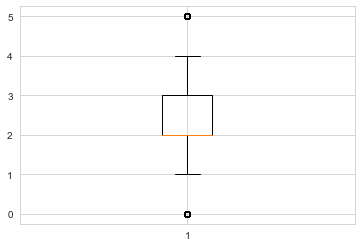

In [18]:
plt.boxplot(newdf['bedrooms'])

In [19]:
newdf['bathrooms'].value_counts().sort_values(ascending=False)

1.0     61809
2.0     46019
3.0      3947
0.0      2484
4.0       367
5.0        51
8.0         5
6.0         4
12.0        3
25.0        1
32.0        1
Name: bathrooms, dtype: int64

In [20]:
Q1 = newdf['bathrooms'].quantile(0.25)
Q3 = newdf['bathrooms'].quantile(0.75)
IQR = Q3-Q1
newdf = newdf[(newdf['bathrooms'] > (Q1 - 3*IQR)) & (newdf['bathrooms'] < (Q3 + 3*IQR))]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc5901379d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc590137f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc5901376d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc5905fe550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc5905fe820>],
 'means': []}

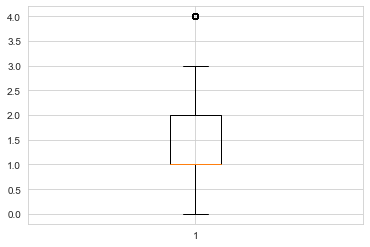

In [21]:
plt.boxplot(newdf['bathrooms'])

In [22]:
newdf['carspaces'].value_counts().sort_values(ascending=False)

1.0      50172
2.0      35086
0.0      23224
3.0       2863
4.0       2351
5.0        331
6.0        316
8.0         77
7.0         61
10.0        38
15.0        13
9.0         13
12.0        11
20.0         9
16.0         7
14.0         7
11.0         6
24.0         4
13.0         4
23.0         4
18.0         3
30.0         3
85.0         3
36.0         2
50.0         2
17.0         2
22.0         2
76.0         1
26.0         1
31.0         1
56.0         1
67.0         1
200.0        1
130.0        1
109.0        1
33.0         1
28.0         1
38.0         1
32.0         1
Name: carspaces, dtype: int64

In [23]:
Q1 = newdf['carspaces'].quantile(0.25)
Q3 = newdf['carspaces'].quantile(0.75)
IQR = Q3-Q1
newdf = newdf[(newdf['carspaces'] > (Q1 - 3*IQR)) & (newdf['carspaces'] < (Q3 + 3*IQR))]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc59022ec10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc5902421f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc590628040>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc590242790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc590242a60>],
 'means': []}

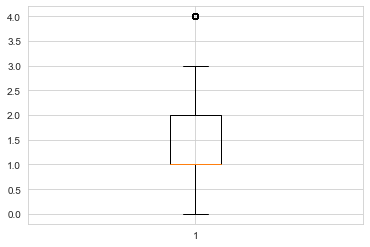

In [24]:
plt.boxplot(newdf['carspaces'])

#### 4. Bond
where property has bond it will be 1 else 0

In [25]:
newdf = newdf.drop(['Unnamed: 0','price','rent','geometry', 'geoLocation','index_right'], axis=1)
newdf = newdf.assign(has_bond=np.where(newdf.bond.isnull(), 0, 1))
newdf = newdf.drop(['bond'], axis=1)
newdf.head(3)

,index,propertyTypes,bathrooms,bedrooms,carspaces,dateUpdated,dateListed,landAreaSqm,postcode,surburb,year,month,longitude,latitude,SA2_maincode_2021,distance of the closest bus stop,count of bus stop,distance of the closest train stop,count of train stop,distance of the closest tram stop,count of tram stop,distance of the closest vline stop,count of vline stop,distance of the closest school,count of school,count of hospital,distance to the closest shopping mall,count of shopping mall,bench,cafe,childcare,fast_food,kindergarten,parking,restaurant,place_of_worship,school,university,garden,park,playground,pitch,offence count,incidents recorded,Population,Population Increase,Earners (persons),Median age of earners (years),Sum ($),Median ($),Mean ($),Male,Female,Person,Male Ratio,Female Ratio,rent price,RentPrice_log,has_bond
0,0,['apartmentUnitFlat'],1.0,1.0,0.0,2019-01-09T00:23:18.123Z,2016-02-16T04:33:49Z,NaN,3205,south melbourne,2019,1,144.960873,-37.834163,206051512,0.436505,10,NaN,0,0.438447,24,NaN,0,0.441059,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,5.886104,0
1,9,['house'],2.0,2.0,1.0,2019-01-11T17:10:21.69Z,2018-10-24T23:20:07Z,NaN,3205,south melbourne,2019,1,144.964862,-37.835075,206051512,0.432419,10,NaN,0,0.434362,24,NaN,0,0.436974,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,725.0,6.586172,0
2,10,['apartmentUnitFlat'],1.0,2.0,0.0,2019-01-03T02:02:17.513Z,2018-10-25T00:57:25Z,NaN,3205,south melbourne,2019,1,144.960818,-37.840217,206051512,0.434637,10,NaN,0,0.436558,24,NaN,0,0.439169,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,6.214608,0


In [26]:
newdf.head(10)

,index,propertyTypes,bathrooms,bedrooms,carspaces,dateUpdated,dateListed,landAreaSqm,postcode,surburb,year,month,longitude,latitude,SA2_maincode_2021,distance of the closest bus stop,count of bus stop,distance of the closest train stop,count of train stop,distance of the closest tram stop,count of tram stop,distance of the closest vline stop,count of vline stop,distance of the closest school,count of school,count of hospital,distance to the closest shopping mall,count of shopping mall,bench,cafe,childcare,fast_food,kindergarten,parking,restaurant,place_of_worship,school,university,garden,park,playground,pitch,offence count,incidents recorded,Population,Population Increase,Earners (persons),Median age of earners (years),Sum ($),Median ($),Mean ($),Male,Female,Person,Male Ratio,Female Ratio,rent price,RentPrice_log,has_bond
0,0,['apartmentUnitFlat'],1.0,1.0,0.0,2019-01-09T00:23:18.123Z,2016-02-16T04:33:49Z,NaN,3205,south melbourne,2019,1,144.960873,-37.834163,206051512,0.436505,10,NaN,0,0.438447,24,NaN,0,0.441059,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,5.886104,0
1,9,['house'],2.0,2.0,1.0,2019-01-11T17:10:21.69Z,2018-10-24T23:20:07Z,NaN,3205,south melbourne,2019,1,144.964862,-37.835075,206051512,0.432419,10,NaN,0,0.434362,24,NaN,0,0.436974,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,725.0,6.586172,0
2,10,['apartmentUnitFlat'],1.0,2.0,0.0,2019-01-03T02:02:17.513Z,2018-10-25T00:57:25Z,NaN,3205,south melbourne,2019,1,144.960818,-37.840217,206051512,0.434637,10,NaN,0,0.436558,24,NaN,0,0.439169,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,6.214608,0
3,11,['house'],1.0,3.0,0.0,2019-01-03T17:06:05.923Z,2018-10-25T22:30:15Z,NaN,3205,south melbourne,2019,1,144.953039,-37.836653,206051512,0.443168,10,NaN,0,0.445094,24,NaN,0,0.447706,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,795.0,6.678342,0
4,21,['house'],2.0,2.0,0.0,2019-01-12T17:10:42.533Z,2018-10-31T22:21:33Z,NaN,3205,south melbourne,2019,1,144.949687,-37.837520,206051512,0.446094,10,NaN,0,0.448013,24,NaN,0,0.450625,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,825.0,6.715383,0
5,23,['house'],3.0,3.0,1.0,2019-01-07T17:11:21.593Z,2018-11-01T00:49:06Z,NaN,3205,south melbourne,2019,1,144.948053,-37.838317,206051512,0.447407,10,NaN,0,0.449322,24,NaN,0,0.451934,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800.0,6.684612,0
6,25,['apartmentUnitFlat'],2.0,2.0,2.0,2019-01-10T17:10:35Z,2018-11-02T04:15:50Z,NaN,3205,south melbourne,2019,1,144.971036,-37.834074,206051512,0.426885,10,NaN,0,0.428837,24,NaN,0,0.431449,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,650.0,6.476972,0
7,28,['apartmentUnitFlat'],1.0,2.0,1.0,2019-01-12T17:10:42.333Z,2018-11-07T22:00:06Z,NaN,3205,south melbourne,2019,1,144.965487,-37.836918,206051512,0.431233,10,NaN,0,0.433169,24,NaN,0,0.435781,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,630.0,6.445720,0
8,35,['house'],2.0,2.0,1.0,2019-01-14T17:10:07.277Z,2018-11-11T23:10:29Z,NaN,3205,south melbourne,2019,1,144.966546,-37.834014,206051512,0.431166,10,NaN,0,0.433113,24,NaN,0,0.435726,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,450.0,6.109248,0
9,

#### 5.Listing duration
How many days the property is listed on the site

In [27]:
newdf["dateListed"] = pd.to_datetime(newdf["dateListed"])
newdf["dateUpdated"] = pd.to_datetime(newdf["dateUpdated"])
newdf['list_duration']=(newdf['dateUpdated']- newdf['dateListed']).dt.days


newdf = newdf.drop(['dateUpdated','dateListed'], axis=1)

newdf.head(3)

,index,propertyTypes,bathrooms,bedrooms,carspaces,landAreaSqm,postcode,surburb,year,month,longitude,latitude,SA2_maincode_2021,distance of the closest bus stop,count of bus stop,distance of the closest train stop,count of train stop,distance of the closest tram stop,count of tram stop,distance of the closest vline stop,count of vline stop,distance of the closest school,count of school,count of hospital,distance to the closest shopping mall,count of shopping mall,bench,cafe,childcare,fast_food,kindergarten,parking,restaurant,place_of_worship,school,university,garden,park,playground,pitch,offence count,incidents recorded,Population,Population Increase,Earners (persons),Median age of earners (years),Sum ($),Median ($),Mean ($),Male,Female,Person,Male Ratio,Female Ratio,rent price,RentPrice_log,has_bond,list_duration
0,0,['apartmentUnitFlat'],1.0,1.0,0.0,NaN,3205,south melbourne,2019,1,144.960873,-37.834163,206051512,0.436505,10,NaN,0,0.438447,24,NaN,0,0.441059,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,5.886104,0,1057
1,9,['house'],2.0,2.0,1.0,NaN,3205,south melbourne,2019,1,144.964862,-37.835075,206051512,0.432419,10,NaN,0,0.434362,24,NaN,0,0.436974,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,725.0,6.586172,0,78
2,10,['apartmentUnitFlat'],1.0,2.0,0.0,NaN,3205,south melbourne,2019,1,144.960818,-37.840217,206051512,0.434637,10,NaN,0,0.436558,24,NaN,0,0.439169,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,6.214608,0,70


## Missing values 

In [28]:
missing = newdf.isnull().sum()/len(newdf['index'])*100
missing[missing>0]

landAreaSqm                              93.370039
distance of the closest bus stop          1.636821
distance of the closest train stop       54.254327
distance of the closest tram stop        47.270792
distance of the closest vline stop       59.763756
distance of the closest school            2.121447
count of school                           1.273572
distance to the closest shopping mall    42.976886
bench                                     0.010554
cafe                                      0.010554
childcare                                 0.010554
fast_food                                 0.010554
kindergarten                              0.010554
parking                                   0.010554
restaurant                                0.010554
place_of_worship                          0.010554
school                                    0.010554
university                                0.010554
garden                                    0.010554
park                           

In [29]:
# drop columns that has too much missing value, unable to impute -- landAreaSqm
newdf = newdf.drop(['landAreaSqm'], axis=1)
newdf.head(3)

,index,propertyTypes,bathrooms,bedrooms,carspaces,postcode,surburb,year,month,longitude,latitude,SA2_maincode_2021,distance of the closest bus stop,count of bus stop,distance of the closest train stop,count of train stop,distance of the closest tram stop,count of tram stop,distance of the closest vline stop,count of vline stop,distance of the closest school,count of school,count of hospital,distance to the closest shopping mall,count of shopping mall,bench,cafe,childcare,fast_food,kindergarten,parking,restaurant,place_of_worship,school,university,garden,park,playground,pitch,offence count,incidents recorded,Population,Population Increase,Earners (persons),Median age of earners (years),Sum ($),Median ($),Mean ($),Male,Female,Person,Male Ratio,Female Ratio,rent price,RentPrice_log,has_bond,list_duration
0,0,['apartmentUnitFlat'],1.0,1.0,0.0,3205,south melbourne,2019,1,144.960873,-37.834163,206051512,0.436505,10,NaN,0,0.438447,24,NaN,0,0.441059,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,5.886104,0,1057
1,9,['house'],2.0,2.0,1.0,3205,south melbourne,2019,1,144.964862,-37.835075,206051512,0.432419,10,NaN,0,0.434362,24,NaN,0,0.436974,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,725.0,6.586172,0,78
2,10,['apartmentUnitFlat'],1.0,2.0,0.0,3205,south melbourne,2019,1,144.960818,-37.840217,206051512,0.434637,10,NaN,0,0.436558,24,NaN,0,0.439169,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,6.214608,0,70


impute those with 32% missing % with postcode median 

In [30]:
## impute those with 32% missing % with postcode median 
# newdf['Population Increase'].fillna((newdf['Population Increase'].median()), inplace=True)
newdf['PopulationIncrease'] = newdf['Population Increase']
newdf['PopulationIncrease'] = newdf['PopulationIncrease'].fillna(newdf.groupby('postcode').PopulationIncrease.transform('median'))
# newdf.head(3)

In [31]:
newdf['Earners'] = newdf['Earners (persons)']
newdf['Earners'] = newdf['Earners'].fillna(newdf.groupby('postcode').Earners.transform('median'))
# newdf.head(3)

In [32]:
newdf['Earners_age'] = newdf['Median age of earners (years)']
newdf['Earners_age'] = newdf['Earners_age'].fillna(newdf.groupby('postcode').Earners_age.transform('median'))
# newdf.head(3)

In [33]:
newdf['income_sum'] = newdf['Sum ($)']
newdf['income_sum'] = newdf['income_sum'].fillna(newdf.groupby('postcode').income_sum.transform('median'))
# newdf.head(3)

In [34]:
newdf['income_median'] = newdf['Median ($)']
newdf['income_median'] = newdf['income_median'].fillna(newdf.groupby('postcode').income_median.transform('median'))
# newdf.head(3)

In [35]:
newdf['income_mean'] = newdf['Mean ($)']
newdf['income_mean'] = newdf['income_mean'].fillna(newdf.groupby('postcode').income_mean.transform('median'))
# newdf.head(3)

In [36]:
newdf['Male'] = newdf['Male'].fillna(newdf.groupby('postcode').Male.transform('median'))
newdf['Female'] = newdf['Female'].fillna(newdf.groupby('postcode').Female.transform('median'))
newdf['Person'] = newdf['Person'].fillna(newdf.groupby('postcode').Person.transform('median'))
# newdf.head(3)

In [37]:
newdf['MaleRatio'] = newdf['Male Ratio']
newdf['MaleRatio'] = newdf['MaleRatio'].fillna(newdf.groupby('postcode').MaleRatio.transform('median'))
newdf['FemaleRatio'] = newdf['Female Ratio']
newdf['FemaleRatio'] = newdf['FemaleRatio'].fillna(newdf.groupby('postcode').FemaleRatio.transform('median'))
# newdf.head(3)

In [38]:
newdf = newdf.drop(['Population Increase', 'Earners (persons)', 'Median age of earners (years)',\
    'Sum ($)', 'Median ($)', 'Mean ($)','Male Ratio','Female Ratio'], axis=1)



Drop all rows with postcode that is empty

In [39]:
## Drop all rows with postcode that is empty
newdf = newdf[newdf['postcode']!=0]
newdf.shape

(113686, 57)

Fill the rest with 0.

In [40]:
newdf=newdf.fillna(0)

## Categorical Data 
Property Type

In [41]:
# house, unit/apartment, others 

newdf['ishouse'] = newdf['propertyTypes'].str.contains("house|townhouse|newHouseLand|villa")

newdf['isapartment'] = newdf['propertyTypes'].str.contains("Unit|blockOfUnits|newApartments|penthouse")

newdf['isother'] = ~(newdf['isapartment'])& ~(newdf['ishouse'])

newdf = newdf.drop(['propertyTypes'], axis=1)

# newdf[newdf['isother'] == True]

In [42]:
# from sklearn.preprocessing import OneHotEncoder
# OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
# newdf = pd.DataFrame(OH_encoder.fit_transform(newdf['propertyTypes']))
# # OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[low_cardinality_cols]))
# newdf.head(4)


In [43]:
newdf.describe()

,index,bathrooms,bedrooms,carspaces,postcode,year,month,longitude,latitude,SA2_maincode_2021,distance of the closest bus stop,count of bus stop,distance of the closest train stop,count of train stop,distance of the closest tram stop,count of tram stop,distance of the closest vline stop,count of vline stop,distance of the closest school,count of school,count of hospital,distance to the closest shopping mall,count of shopping mall,bench,cafe,childcare,fast_food,kindergarten,parking,restaurant,place_of_worship,school,university,garden,park,playground,pitch,offence count,incidents recorded,Population,Male,Female,Person,rent price,RentPrice_log,has_bond,list_duration,PopulationIncrease,Earners,Earners_age,income_sum,income_median,income_mean,MaleRatio,FemaleRatio
count,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,1.136860e+05,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,113686.000000,1.136860e+05,113686.000000,113686.000000,113686.000000,113686.000000
mean,57714.010995,1.459415,2.396997,1.216764,3192.331703,2020.501706,6.031868,144.929256,-37.787447,2.084463e+08,0.507777,64.948032,0.228900,0.913507,0.243444,9.788963,0.243009,0.640598,0.522894,7.170021,1.275390,0.278492,3.058055,33.966619,15.831448,0.968774,11.197720,2.812642,96.877716,18.822986,5.493376,8.543330,0.523108,21.723150,51.348768,18.596450,58.783518,37464.895801,28544.467832,15552.431555,7212.579041,7334.436588,14553.581916,754.558143,5.765399,0.318905,57.836189,0.010617,10620.111787,37.679269,8.502551e+08,56292.707743,76567.099204,0.485248,0.492061
std,33566.420448,0.612375,1.065210,0.867616,255.685363,1.092869,3.385724,0.535013,0.434942,3.374683e+06,0.320152,66.710924,0.268337,1.239292,0.232681,11.525708,0.416648,1.149134,0.325587,6.368166,1.712354,0.328788,7.132582,46.052732,21.738336,1.575350,13.314679,3.985196,115.387366,27.326856,6.202965,10.424666,1.683484,66.991445,78.946358,25.489153,83.538260,42270.634202,32736.484543,4961.914677,3325.606391,3366.947996,6680.417714,7540.017382,1.581869,0.466054,156.610338,0.102324,3808.310938,8.111566,4.151133e+08,14074.042660,27878.749211,0.077073,0.078032
min,0.000000,0.000000,0.000000,0.000000,3000.000000,2019.000000,1.000000,141.010619,-38.689770,2.010110e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-0.178819,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,28536.250000,1.000000,2.000000,1.000000,3029.000000,2020.000000,3.000000,144.922394,-37.871616,2.060415e+08,0.409786,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.431521,3.000000,0.000000,0.000000,0.000000,4.000000,2.000000,0.000000,2.000000,0.000000,19.000000,1.000000,1.000000,2.000000,0.000000,0.000000,11.000000,4.000000,6.000000,11786.000000,9101.000000,12100.000000,4856.000000,4907.000000,9810.085605,350.000000,5.857933,0.000000,12.000000,-0.016147,8075.645224,33.428936,6.029211e+08,49189.825205,61912.461187,0.483373,0.496908
50%,57519.500000,1.000000,2.000000,1.000000,3122.000000,2021.000000,6.000000,144.967213,-37.823152,2.070112e+08,0.456846,39.000000,0.000000,0.000000,0.392522,3.000000,0.000000,0.000000,0.465394,5.000000,1.000000,0.254550,1.000000,22.000000,8.00

Check correlation

In [44]:
# Fill diagonal and upper half with NaNs
corr = newdf.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

/var/folders/74/fx737_kn4xj3gvzzm58zqvm00000gn/T/ipykernel_22813/111258755.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr


,index,bathrooms,bedrooms,carspaces,postcode,year,month,longitude,latitude,SA2_maincode_2021,distance of the closest bus stop,count of bus stop,distance of the closest train stop,count of train stop,distance of the closest tram stop,count of tram stop,distance of the closest vline stop,count of vline stop,distance of the closest school,count of school,count of hospital,distance to the closest shopping mall,count of shopping mall,bench,cafe,childcare,fast_food,kindergarten,parking,restaurant,place_of_worship,school,university,garden,park,playground,pitch,offence count,incidents recorded,Population,Male,Female,Person,rent price,RentPrice_log,has_bond,list_duration,PopulationIncrease,Earners,Earners_age,income_sum,income_median,income_mean,MaleRatio,FemaleRatio,ishouse,isapartment,isother
index,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bathrooms,0.08,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bedrooms,0.30,0.64,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
carspaces,0.27,0.40,0.59,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
postcode,0.35,0.10,0.27,0.24,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
year,0.03,-0.01,-0.03,-0.03,-0.05,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
month,0.02,0.01,0.02,0.02,0.02,-0.14,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
longitude,-0.11,0.01,-0.04,-0.03,0.15,0.01,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
latitude,0.13,-0.04,0.01,0.02,0.06,-0.01,-0.00,-0.28,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
SA2_maincode_2021,0.39,0.17,0.35,0.30,0.27,-0.03,0.02,-0.26,0.06,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


<AxesSubplot:>

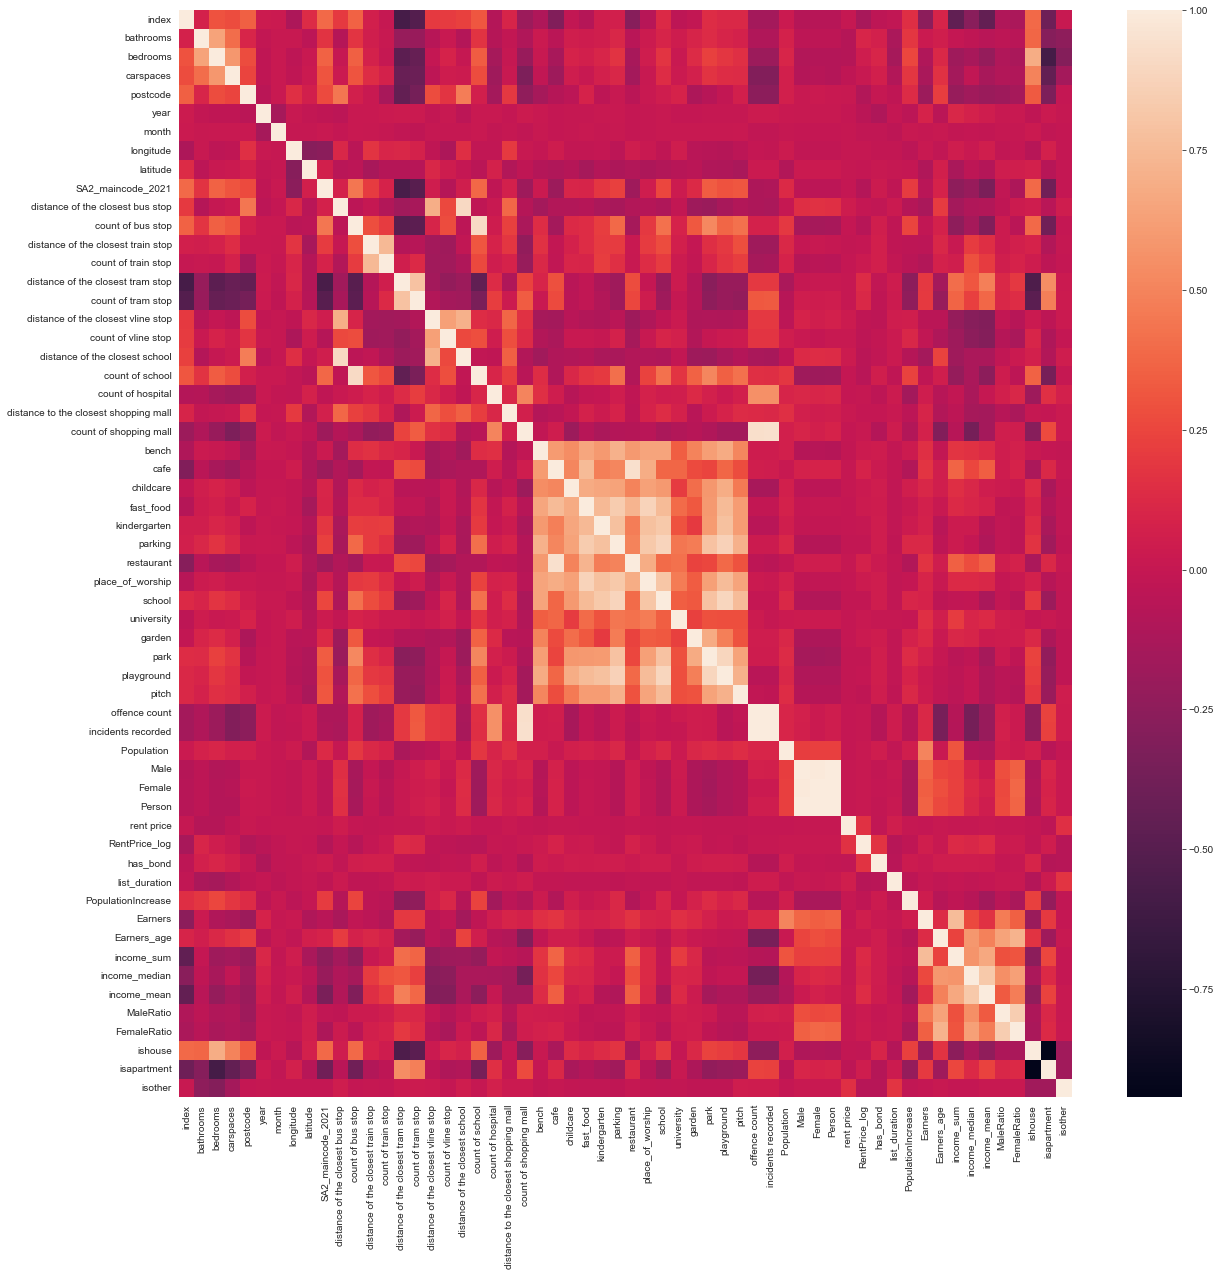

In [45]:
# Lets explore the correlations in our data set 
plt.figure(figsize=(20,20))
sns.heatmap(newdf.corr())

## Feature Selection 


f_regression
F-value between label/feature for regression tasks.

In [46]:
newdf.columns

Index(['index', 'bathrooms', 'bedrooms', 'carspaces', 'postcode', 'surburb',
       'year', 'month', 'longitude', 'latitude', 'SA2_maincode_2021',
       'distance of the closest bus stop', 'count of bus stop',
       'distance of the closest train stop', 'count of train stop',
       'distance of the closest tram stop', 'count of tram stop',
       'distance of the closest vline stop', 'count of vline stop',
       'distance of the closest school', 'count of school',
       'count of hospital', 'distance to the closest shopping mall',
       'count of shopping mall', 'bench', 'cafe', 'childcare', 'fast_food',
       'kindergarten', 'parking', 'restaurant', 'place_of_worship', 'school',
       'university', 'garden', 'park', 'playground', 'pitch', 'offence count',
       'incidents recorded', 'Population ', 'Male', 'Female', 'Person',
       'rent price', 'RentPrice_log', 'has_bond', 'list_duration',
       'PopulationIncrease', 'Earners', 'Earners_age', 'income_sum',
       'income_me

In [47]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
y = newdf['RentPrice_log']
X = newdf.drop(['RentPrice_log','rent price','surburb','index', 'SA2_maincode_2021', 'longitude', 'latitude','incidents recorded','Person',\
    'income_median', 'income_mean'], axis=1)
selector = SelectKBest(f_regression, k=20)
selector.fit(X, y)
X.columns[selector.get_support()]

Index(['bathrooms', 'bedrooms', 'postcode', 'year', 'count of bus stop',
       'distance of the closest tram stop', 'count of tram stop',
       'count of vline stop', 'distance of the closest school',
       'count of school', 'cafe', 'restaurant', 'place_of_worship', 'has_bond',
       'list_duration', 'Earners', 'income_sum', 'FemaleRatio', 'isapartment',
       'isother'],
      dtype='object')

Mutual information for a continuous target.
mutual_info_regression

In [48]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
#Select top 2 features based on mutual info regression
selector = SelectKBest(mutual_info_regression, k =20)
selector.fit(X, y)
X.columns[selector.get_support()]

Index(['postcode', 'distance of the closest bus stop', 'count of bus stop',
       'distance of the closest tram stop',
       'distance of the closest vline stop', 'distance of the closest school',
       'distance to the closest shopping mall', 'parking', 'park', 'pitch',
       'offence count', 'Population ', 'Male', 'Female', 'PopulationIncrease',
       'Earners', 'Earners_age', 'income_sum', 'MaleRatio', 'FemaleRatio'],
      dtype='object')

Using different feature selection method, we can see that common features that are important to rental price are:
 - location 
 - transportation: bus, tram 
 - facilities: school, shopping mall 
 - security
 - population and income 

 Predictable factor: population and income 

 Metrix design should be around all above factors.

In [49]:
X_length = X.shape[0]
split = int(X_length * 0.8)
X_train,X_test = X[:split].astype('int'),X[split:].astype('int')
y_train,y_test = y[:split].astype('int'),y[split:].astype('int')

In [50]:
from sklearn.ensemble import RandomForestRegressor

model1 = RandomForestRegressor(n_estimators=100)
model1.fit(X_train,y_train)

RandomForestRegressor()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


0.0 FemaleRatio
0.0 MaleRatio
0.0 distance of the closest tram stop
8.022434404312588e-07 distance of the closest train stop
2.387644348424343e-05 distance to the closest shopping mall
5.3540977291883716e-05 distance of the closest vline stop
0.00012043404356559908 distance of the closest school
0.00020585468914937683 distance of the closest bus stop
0.0005249065123047008 PopulationIncrease
0.0011597557504143742 university
0.002908624822840227 isother
0.002951445316007433 count of vline stop
0.003160834879117338 count of hospital
0.003197890840485852 childcare
0.0032235079786921807 count of shopping mall
0.0036632235900795097 kindergarten
0.0037725233195339152 count of train stop
0.0042088280205385365 fast_food
0.004823298784004857 restaurant
0.004929259593935792 cafe
0.0049761671727435825 place_of_worship
0.005398944357844256 count of school
0.005556827706388219 school
0.005756342288969599 garden
0.006388023454797316 park
0.006543861370460872 parking
0.007656187839504304 pitch
0.00835

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


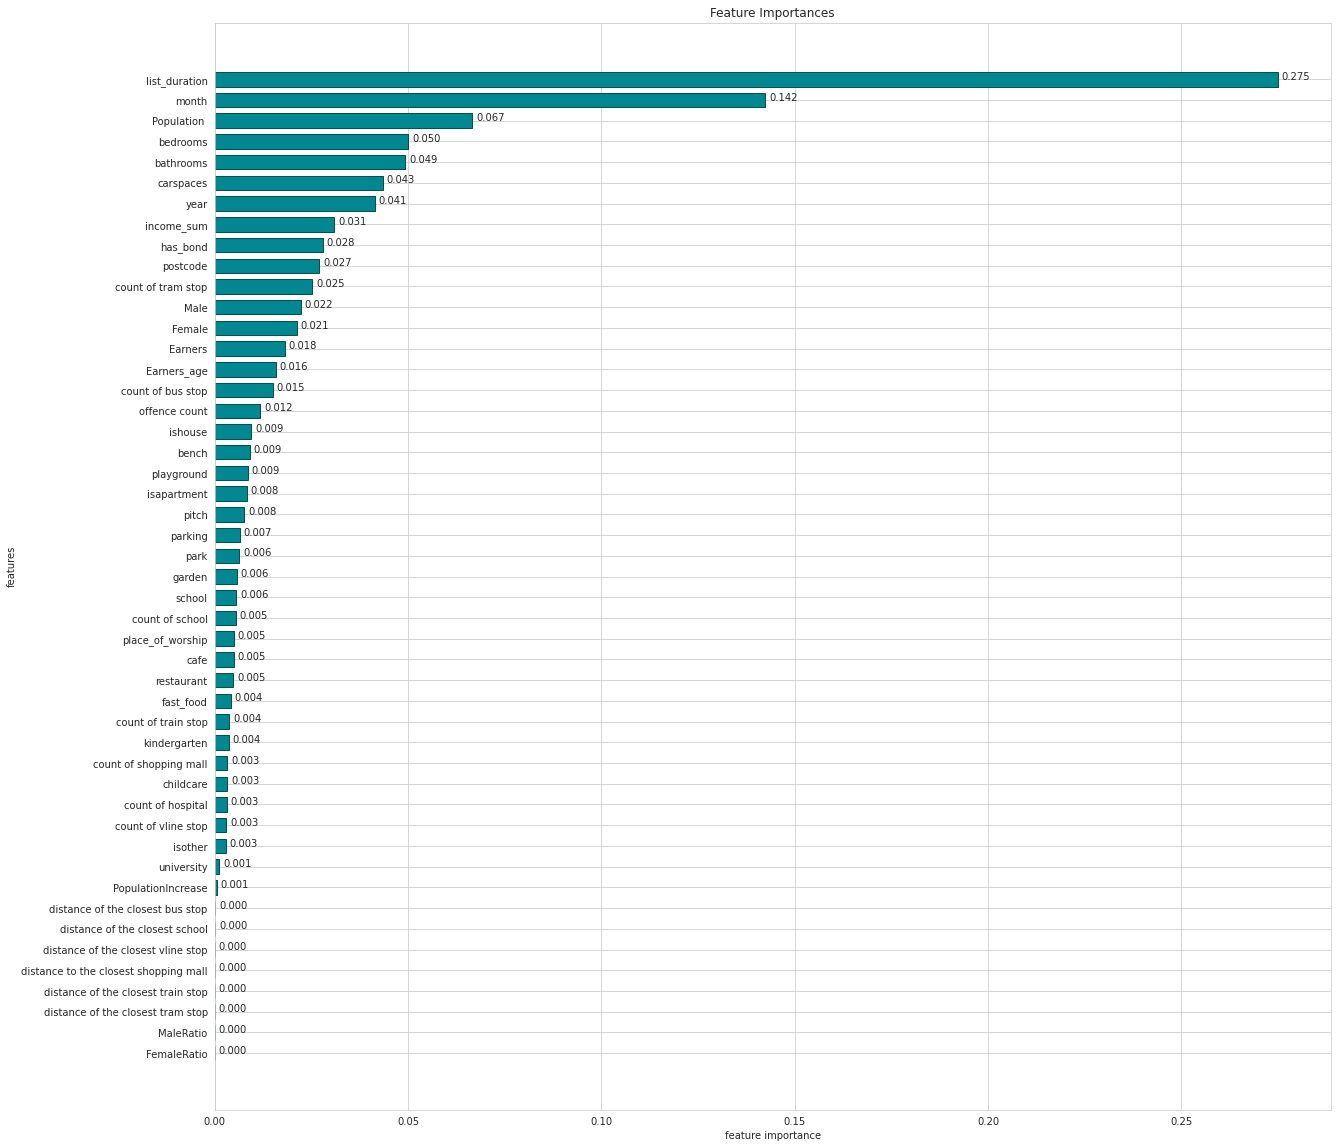

In [53]:

features_import = pd.DataFrame(X.columns, columns=['feature'])
features_import['importance'] = model1.feature_importances_  
features_import.sort_values('importance', inplace=True)

# from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.figure(figsize=(20,20))
plt.barh(features_import['feature'], features_import['importance'], height=0.7, color='#008792', edgecolor='#005344') 
plt.xlabel('feature importance')
plt.ylabel('features') 
plt.title('Feature Importances') 
for a,b in zip( features_import['importance'],features_import['feature']): 
   print(a,b)
   plt.text(a+0.001, b,'%.3f'%float(a)) 
plt.show()

## Model Selection 
Decision Tree — A tree algorithm used in machine learning to find patterns in data by learning decision rules.

Random Forest — A type of bagging method that plays on ‘the wisdom of crowds’ effect. It uses multiple independent decision trees in parallel to learn from data and aggregates their predictions for an outcome.

Gradient Boosting Machines — A type of boosting method that uses a combination of decision tree in series. Each tree is used to predict and correct the errors by the preceding tree additively.

In [54]:
import os
from scipy import signal


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

# to make this notebook's output stable across runs
np.random.seed(42)

#for accuracy_score, classification_report and confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
# PROJECT_ROOT_DIR = ".."
# TOPIC_ID = "svm"
# IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", TOPIC_ID)
# os.makedirs(IMAGES_PATH, exist_ok=True)


KNN

In [55]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

def logregClassifier(X, y):
    scores =[]
    # skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    # skf.get_n_splits(X, y)
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    kfold.get_n_splits()
    for train_index, test_index in kfold.split(X,y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        lr = LinearRegression().fit(X_train, y_train)
        
        score = lr.score(X_test, y_test)
        scores.append(score)
    scores = np.asarray(scores)
    return scores, scores.mean().round(4)

In [56]:
logregClassifier(X,y)

(array([0.08542425, 0.08965554, 0.09055364, 0.08923861, 0.08534895]), 0.088)

In [57]:
# from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

def dtClassifier(X, y):
    scores =[]
    # skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    # skf.get_n_splits(X, y)
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    kfold.get_n_splits()
    for train_index, test_index in kfold.split(X,y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        dt = DecisionTreeRegressor().fit(X_train, y_train)
        
        score = dt.score(X_test, y_test)
        scores.append(score)
    scores = np.asarray(scores)
    return scores, scores.mean().round(4)

In [58]:
dtClassifier(X, y)

(array([-0.43515054, -0.48131249, -0.42174122, -0.3252982 , -0.46226877]),
 -0.4252)

In [ ]:
# from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

def rfClassifier(X, y):
    scores =[]
    # skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    # skf.get_n_splits(X, y)
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    kfold.get_n_splits()
    for train_index, test_index in kfold.split(X,y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        rf = RandomForestRegressor().fit(X_train, y_train)
        
        score = rf.score(X_test, y_test)
        scores.append(score)
    scores = np.asarray(scores)
    return scores, scores.mean().round(4)

In [ ]:
rfClassifier(X, y)

(array([0.23655397, 0.24485276, 0.25764734, 0.25872332, 0.25378298]), 0.2503)

In [ ]:
# from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor

def gbcClassifier(X, y):
    scores =[]
    # skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    # skf.get_n_splits(X, y)
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    kfold.get_n_splits()
    for train_index, test_index in kfold.split(X,y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        gbc = GradientBoostingRegressor().fit(X_train, y_train)
        
        score = gbc.score(X_test, y_test)
        scores.append(score)
    scores = np.asarray(scores)
    return scores, scores.mean().round(4)

In [ ]:
gbcClassifier(X, y)

(array([0.15888162, 0.1490803 , 0.16334136, 0.158655  , 0.15912897]), 0.1578)